In [1]:
from tensorflow.keras.applications import EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras import layers
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [2]:
model = EfficientNetB0(include_top=False, weights='imagenet')

16711680/16705208 [==============================] - 0s 0us/step


In [3]:
batch_size = 64
NUM_CLASSES = 13
IMG_SIZE = 224

In [4]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    #model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


In [5]:
model = build_model(num_classes=NUM_CLASSES)

In [6]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_______________________________________________________________________________________

In [7]:
model = build_model(num_classes=NUM_CLASSES)

datagen_train = ImageDataGenerator(rescale=1.0/255.0, samplewise_center=True, samplewise_std_normalization=True,
    rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, brightness_range=[0.2,1.0],
    horizontal_flip=True, fill_mode="nearest")

datagen_val = ImageDataGenerator(rescale=1.0/255.0, samplewise_center=True, samplewise_std_normalization=True)

train_it = datagen_train.flow_from_directory('../input/recaptcha-data/recaptcha_data/train/', target_size=(IMG_SIZE, IMG_SIZE), batch_size = batch_size)
val_it = datagen_val.flow_from_directory('../input/recaptcha-data/recaptcha_data/val', target_size=(IMG_SIZE, IMG_SIZE))

epochs = 15
history = model.fit(train_it, epochs=epochs, validation_data=val_it, verbose=2)

Found 16439 images belonging to 13 classes.
Found 4117 images belonging to 13 classes.
Epoch 1/15
257/257 - 449s - loss: 1.3373 - accuracy: 0.6015 - val_loss: 2.4051 - val_accuracy: 0.2077
Epoch 2/15
257/257 - 320s - loss: 0.6889 - accuracy: 0.7775 - val_loss: 1.4167 - val_accuracy: 0.5397
Epoch 3/15
257/257 - 319s - loss: 0.5612 - accuracy: 0.8114 - val_loss: 1.0015 - val_accuracy: 0.6636
Epoch 4/15
257/257 - 315s - loss: 0.4859 - accuracy: 0.8345 - val_loss: 0.6407 - val_accuracy: 0.7865
Epoch 5/15
257/257 - 310s - loss: 0.4397 - accuracy: 0.8519 - val_loss: 0.6136 - val_accuracy: 0.8008
Epoch 6/15
257/257 - 302s - loss: 0.3798 - accuracy: 0.8680 - val_loss: 0.5226 - val_accuracy: 0.8280
Epoch 7/15
257/257 - 297s - loss: 0.3434 - accuracy: 0.8805 - val_loss: 0.5053 - val_accuracy: 0.8373
Epoch 8/15
257/257 - 299s - loss: 0.3205 - accuracy: 0.8889 - val_loss: 0.6653 - val_accuracy: 0.7875
Epoch 9/15
257/257 - 301s - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.5281 - val_accuracy: 0.

In [8]:
preds = model.evaluate(val_it)

129/129 [==============================] - 12s 96ms/step - loss: 0.6267 - accuracy: 0.8251


cctg

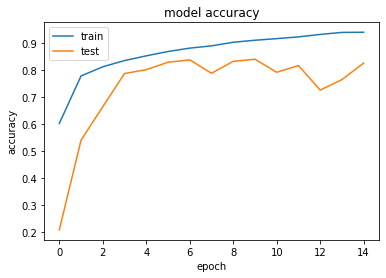

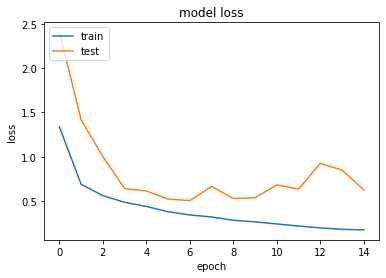

In [9]:
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.save('EfficientNetB0')